In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
df_17 = pd.read_excel('C:/Users/User/Documents/PadMount/Data/2017.xlsx', index_col='ID')
df_12 = pd.read_excel('C:/Users/User/Documents/PadMount/Data/2012.xlsx', index_col='ID')
df_07 = pd.read_excel('C:/Users/User/Documents/PadMount/Data/2007.xlsx', index_col='ID')
df_02 = pd.read_excel('C:/Users/User/Documents/PadMount/Data/2002.xlsx', index_col='ID')

# Data Pre-Processing
* We are changing all the strings to numbers so that it's easy for processing.
* 0 - No Defects
* 1 - Minor Defects
* 2 - Moderate Defects
* 3 - Significant Defects
* 4 - Serious Defects

In [41]:
df_17.head(5)

,Age,Infrared Scan Results,Enclosure,Terminations,Blades,Operating Mechanism,Pad,Health Index
ID,,,,,,,,
1,32,0.03,Moderate Defects,Moderate Defects,Moderate Defects,Moderate Defects,Moderate Defects,3.9
2,56,0.31,Serious Defects,Serious Defects,Serious Defects,Serious Defects,Significant Defects,2.7
3,29,0.02,Moderate Defects,Moderate Defects,Moderate Defects,Moderate Defects,Moderate Defects,4.0
4,17,0.00,Minor Defects,Minor Defects,Minor Defects,Minor Defects,Minor Defects,4.5
5,15,0.00,Minor Defects,Minor Defects,Minor Defects,Minor Defects,Minor Defects,4.5


In [42]:
df_17.Enclosure.unique()

array(['Moderate Defects', 'Serious Defects', 'Minor Defects',
       'Significant Defects'], dtype=object)

In [43]:
df_17.Terminations.unique()

array(['Moderate Defects', 'Serious Defects', 'Minor Defects',
       'Significant Defects'], dtype=object)

In [44]:
df_17.Blades.unique()

array(['Moderate Defects', 'Serious Defects', 'Minor Defects',
       'Significant Defects'], dtype=object)

In [45]:
df_17['Operating Mechanism'].unique()

array(['Moderate Defects', 'Serious Defects', 'Minor Defects',
       'Significant Defects'], dtype=object)

In [46]:
df_17.Pad.unique()

array(['Moderate Defects', 'Significant Defects', 'Minor Defects',
       'Serious Defects'], dtype=object)

In [47]:
def replace(df, columnName):
    df[columnName] = [0 if s == 'No Defect' else s for s in df[columnName]] 
    df[columnName] = [1 if s == 'Minor Defects' else s for s in df[columnName]] 
    df[columnName] = [2 if s == 'Moderate Defects' else s for s in df[columnName]] 
    df[columnName] = [3 if s == 'Significant Defects' else s for s in df[columnName]] 
    df[columnName] = [4 if s == 'Serious Defects' else s for s in df[columnName]] 

In [69]:
replace(df_17, 'Enclosure')
replace(df_17, 'Terminations')
replace(df_17, 'Blades')
replace(df_17, 'Operating Mechanism')
replace(df_17, 'Pad')

In [49]:
df_17.head(5)

,Age,Infrared Scan Results,Enclosure,Terminations,Blades,Operating Mechanism,Pad,Health Index
ID,,,,,,,,
1,32,0.03,2,2,2,2,2,3.9
2,56,0.31,4,4,4,4,3,2.7
3,29,0.02,2,2,2,2,2,4.0
4,17,0.00,1,1,1,1,1,4.5
5,15,0.00,1,1,1,1,1,4.5


In [50]:
df_17.corr()

,Age,Infrared Scan Results,Enclosure,Terminations,Blades,Operating Mechanism,Pad,Health Index
Age,1.000000,0.914362,0.919478,0.960665,0.960591,0.941344,0.977661,-0.950191
Infrared Scan Results,0.914362,1.000000,0.700222,0.795586,0.797685,0.747197,0.881450,-0.913542
Enclosure,0.919478,0.700222,1.000000,0.947570,0.945930,0.968142,0.907658,-0.851062
Terminations,0.960665,0.795586,0.947570,1.000000,0.974207,0.967918,0.941048,-0.889483
Blades,0.960591,0.797685,0.945930,0.974207,1.000000,0.964854,0.942370,-0.889769
Operating Mechanism,0.941344,0.747197,0.968142,0.967918,0.964854,1.000000,0.923767,-0.869995
Pad,0.977661,0.881450,0.907658,0.941048,0.942370,0.923767,1.000000,-0.928234
Health Index,-0.950191,-0.913542,-0.851062,-0.889483,-0.889769,-0.869995,-0.928234,1.000000


<AxesSubplot:>

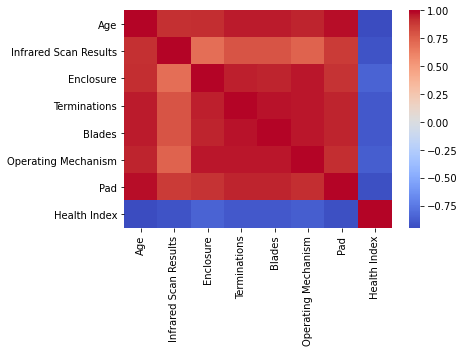

In [52]:
sns.heatmap(df_17.corr(), cmap='coolwarm')

# Sample Model

In [58]:
df_17.columns

Index(['Age', 'Infrared Scan Results', 'Enclosure', 'Terminations', 'Blades',
       'Operating Mechanism', 'Pad', 'Health Index'],
      dtype='object')

In [72]:
X = df_17[['Age', 'Infrared Scan Results', 'Enclosure', 'Terminations', 'Blades',
       'Operating Mechanism', 'Pad']]
y = df_17['Health Index']

In [91]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [83]:
linearModel = LR()
linearModel.fit(X_train, y_train)

LinearRegression()

In [84]:
results = linearModel.predict(X_test)

In [92]:
accuracy = mean_absolute_error(y_test, results)

In [93]:
accuracy

0.31136081795452847

In [90]:
df_17['Health Index'].describe()

count    1310.000000
mean        2.593664
std         1.418361
min         0.100000
25%         1.400000
50%         2.600000
75%         3.800000
max         5.000000
Name: Health Index, dtype: float64